<a href="https://colab.research.google.com/github/Ravindrayadav04/Crop-Recommendation-System/blob/main/Crop_Classification_With_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# Importing Data

In [ ]:
crop = pd.read_csv("Crop_recommendation.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
crop.shape

(2200, 8)

In [ ]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
crop.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [ ]:
crop.duplicated().sum()

0

In [ ]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# Exploring Data

In [ ]:
crop["label"].value_counts()

,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


In [ ]:
# crop['label'].astype('category').cat.codes
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop['label'] = crop['label'].map(crop_dict)

In [ ]:
crop["label"]

,label
0,1
1,1
2,1
3,1
4,1
...,...
2195,22
2196,22
2197,22
2198,22


In [ ]:
# Convert 'label' column to category codes
# crop['label'] = crop['label'].astype('category').cat.codes

# Calculate the correlation matrix
corr = crop.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall,label
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,-0.317076
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,0.109993
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,-0.089209
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,-0.031383
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,-0.640925
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,0.057527
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,-0.311053
label,-0.317076,0.109993,-0.089209,-0.031383,-0.640925,0.057527,-0.311053,1.000000


<Axes: >

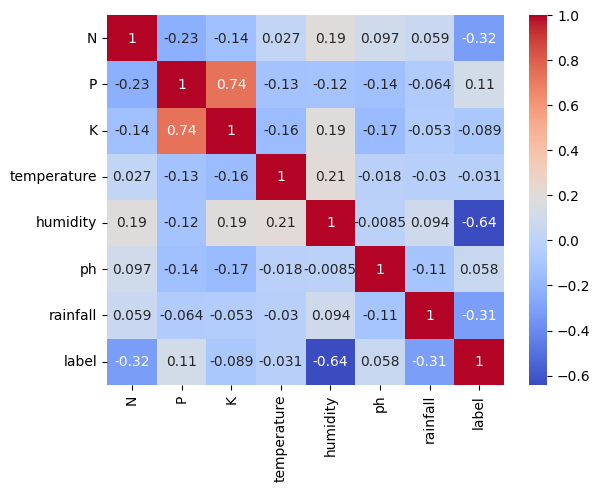

In [ ]:
import seaborn as sns
sns.heatmap(corr,annot=True,cbar=True, cmap='coolwarm')

In [ ]:
crop['label'].value_counts()

,count
label,
1,100
2,100
3,100
4,100
5,100
6,100
7,100
8,100
9,100


<ipython-input-20-112d7ba78cc4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['N'])


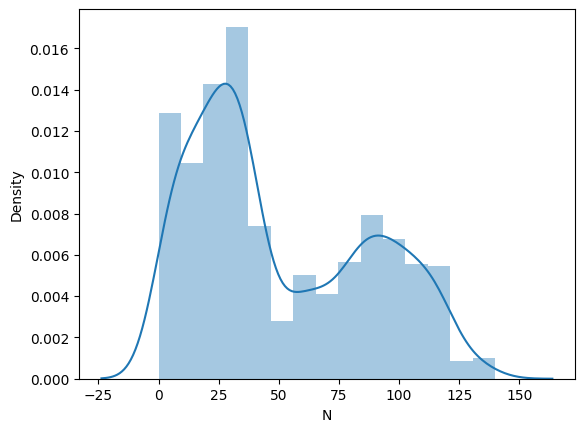

In [ ]:
import matplotlib.pyplot as plt
sns.distplot(crop['N'])
plt.show()

In [ ]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
# crop['crop_num']=crop['label'].map(crop_dict)
crop['crop_num']=crop['label']

In [ ]:
crop['crop_num'].value_counts()

,count
crop_num,
1,100
2,100
3,100
4,100
5,100
6,100
7,100
8,100
9,100


In [ ]:
# crop.drop(['label'],axis=1,inplace=True)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1,1


# Train Test Split

In [ ]:
X = crop.drop(['crop_num','label'],axis=1)
y = crop['crop_num']

In [ ]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [ ]:
y.shape

(2200,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape

(1540, 7)

In [ ]:
X_test.shape

(660, 7)

In [ ]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1264,15,140,195,13.285043,83.541938,5.699453,65.800060
190,79,59,17,20.379997,63.738500,6.644205,108.505442
1304,93,22,52,26.587407,81.325632,6.932740,41.875400
1391,100,10,53,24.543570,84.608083,6.211749,42.006603
686,8,45,18,27.930349,85.420587,7.011031,43.250956
...,...,...,...,...,...,...,...
1119,40,16,35,34.164389,54.164823,4.954740,98.333511
265,29,75,75,19.624163,18.714832,7.064790,88.458569
1366,120,7,47,24.247825,83.036879,6.653868,54.765762
1333,99,5,47,24.130788,84.844946,6.649087,51.194702



# Scale the features using MinMaxScaler

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# ms = MinMaxScaler()

# X_train = ms.fit_transform(X_train)
# X_test = ms.transform(X_test)

In [ ]:
# X_train

# Standarization

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train[0]

array([-0.96859665,  2.63751923,  2.89954823, -2.44053832,  0.54051892,
       -0.98808266, -0.67830931])

In [ ]:
y_train[0]

1

In [ ]:
X_train.shape

(1540, 7)

# Training Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Create instances of all models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),  # Added max_iter to ensure convergence
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}

# Check for NaN values and handle them before fitting models
print(y_train.isna().sum())
print(y_test.isna().sum())

# Drop rows with NaN values in y_train
X_train = X_train[~y_train.isna()]
y_train = y_train.dropna()

# Fit models and evaluate
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Generate a classification report
    report = classification_report(y_test, y_pred, zero_division=0)

    print(f"\n{name} performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)

    # Calculate confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(confusion_mat)


0
0

Logistic Regression performance:
Accuracy: 0.9621
Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.77      0.82        30
           2       1.00      1.00      1.00        30
           3       0.81      0.97      0.88        30
           4       1.00      1.00      1.00        30
           5       0.97      1.00      0.98        30
           6       1.00      0.93      0.97        30
           7       1.00      0.97      0.98        30
           8       1.00      1.00      1.00        30
           9       1.00      1.00      1.00        30
          10       1.00      1.00      1.00        30
          11       1.00      1.00      1.00        30
          12       1.00      1.00      1.00        30
          13       1.00      1.00      1.00        30
          14       1.00      1.00      1.00        30
          15       0.84      0.90      0.87        30
          16       0.82      0.90      0.86        30
   

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost performance:
Accuracy: 0.1818
Classification Report:
              precision    recall  f1-score   support

           1       0.06      1.00      0.11        30
           2       0.00      0.00      0.00        30
           3       0.00      0.00      0.00        30
           4       0.00      0.00      0.00        30
           5       0.00      0.00      0.00        30
           6       0.00      0.00      0.00        30
           7       0.00      0.00      0.00        30
           8       0.50      1.00      0.67        30
           9       1.00      1.00      1.00        30
          10       0.00      0.00      0.00        30
          11       0.00      0.00      0.00        30
          12       0.00      0.00      0.00        30
          13       0.00      0.00      0.00        30
          14       0.00      0.00      0.00        30
          15       0.00      0.00      0.00        30
          16       0.00      0.00      0.00        30
          17      

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import ExtraTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.metrics import accuracy_score

# # create instances of all models
# models = {
#     'Logistic Regression': LogisticRegression(),
#     'Naive Bayes': GaussianNB(),
#     'Support Vector Machine': SVC(),
#     'K-Nearest Neighbors': KNeighborsClassifier(),
#     'Decision Tree': DecisionTreeClassifier(),
#     'Random Forest': RandomForestClassifier(),
#     'Bagging': BaggingClassifier(),
#     'AdaBoost': AdaBoostClassifier(),
#     'Gradient Boosting': GradientBoostingClassifier(),
#     'Extra Trees': ExtraTreeClassifier(),
# }


# print(y_train.isna().sum())
# print(y_test.isna().sum())


# X_train = X_train[~y_train.isna()]
# y_train = y_train.dropna()

# X_test = X_test[~y_test.isna()]
# y_test = y_test.dropna()


# # Handle NaN values in y_train and y_test
# y_train.fillna(y_train.median(), inplace=True)
# y_test.fillna(y_test.median(), inplace=True)

# # Fit models and evaluate
# for name, md in models.items():
#     md.fit(X_train, y_train)
#     y_pred = md.predict(X_test)

#     print(f"{name} with accuracy: {accuracy_score(y_test, y_pred)}")



# # for name, md in models.items():
# #     md.fit(X_train,y_train)
# #     ypred = md.predict(X_test)

# #     print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")



from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}


print(y_train.isna().sum())
print(y_test.isna().sum())

X_train.shape

# Check the shapes of X_train and y_train before dropping NaN values
print(f"Shape of X_train before dropping NaN: {X_train.shape}")
print(f"Shape of y_train before dropping NaN: {y_train.shape}")

# Fit models and evaluate
for name, md in models.items():
    # Drop rows with NaN values in y_train
    X_train = X_train[~y_train.isna()]  # Select rows from X_train where y_train is not NaN
    y_train = y_train.dropna()       # Drop NaN values from y_train

    # # Check the shapes of X_train and y_train after dropping NaN values
    print(f"Shape of X_train after dropping NaN: {X_train.shape}")
    print(f"Shape of y_train after dropping NaN: {y_train.shape}")

    crop.head()


    md.fit(X_train, y_train)
    y_pred = md.predict(X_test)

    print(f"{name} with accuracy: {accuracy_score(y_test, y_pred)}")

# X_train = X_train[~y_train.isna()]
#


# X_test = X_test[~y_test.isna()]
#


# # Check the shapes of X_train and y_train after dropping NaN values
# print(f"Shape of X_train after dropping NaN: {X_train.shape}")
# print(f"Shape of y_train after dropping NaN: {y_train.shape}")


# Handle NaN values in y_train and y_test - This part might be unnecessary if all NaN values are already removed
# y_train.fillna(y_train.median(), inplace=True)
# y_test.fillna(y_test.median(), inplace=True)

# Fit models and evaluate
# for name, md in models.items():
#     md.fit(X_train, y_train)
#     y_pred = md.predict(X_test)

#     print(f"{name} with accuracy: {accuracy_score(y_test, y_pred)}")

crop.head().shape

0
0
Shape of X_train before dropping NaN: (1540, 7)
Shape of y_train before dropping NaN: (1540,)
Shape of X_train after dropping NaN: (1540, 7)
Shape of y_train after dropping NaN: (1540,)
Logistic Regression with accuracy: 0.9621212121212122
Shape of X_train after dropping NaN: (1540, 7)
Shape of y_train after dropping NaN: (1540,)
Naive Bayes with accuracy: 0.9954545454545455
Shape of X_train after dropping NaN: (1540, 7)
Shape of y_train after dropping NaN: (1540,)
Support Vector Machine with accuracy: 0.9757575757575757
Shape of X_train after dropping NaN: (1540, 7)
Shape of y_train after dropping NaN: (1540,)
K-Nearest Neighbors with accuracy: 0.9696969696969697
Shape of X_train after dropping NaN: (1540, 7)
Shape of y_train after dropping NaN: (1540,)
Decision Tree with accuracy: 0.9772727272727273
Shape of X_train after dropping NaN: (1540, 7)
Shape of y_train after dropping NaN: (1540,)
Random Forest with accuracy: 0.9954545454545455
Shape of X_train after dropping NaN: (1540,

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost with accuracy: 0.18181818181818182
Shape of X_train after dropping NaN: (1540, 7)
Shape of y_train after dropping NaN: (1540,)
Gradient Boosting with accuracy: 0.990909090909091
Shape of X_train after dropping NaN: (1540, 7)
Shape of y_train after dropping NaN: (1540,)
Extra Trees with accuracy: 0.8984848484848484


(5, 9)

In [ ]:
y_test

,crop_num
1381,10
952,14
2068,3
1481,9
1455,9
...,...
471,19
526,18
84,1
2150,22


In [ ]:
y_pred

array([10, 14,  1,  9,  9, 10, 16, 13,  6, 12, 21, 18,  5, 17, 13,  2, 11,
        2,  3,  7, 13, 16,  2, 10, 19, 18,  9, 13, 10,  8, 14,  9, 18, 19,
       14, 21, 10,  7,  3,  8, 14,  1,  5, 22,  7, 10, 12,  4, 17,  7, 13,
       10, 17, 11,  1,  2,  1, 12,  2, 14, 11,  4, 14, 19,  5, 21, 20, 18,
        6, 21, 17, 22,  6,  2, 16,  9, 16, 19, 12,  3, 11,  7,  8, 17,  4,
        3, 19, 21,  6,  5, 11, 22,  8,  8,  2,  8,  1, 20, 15, 18, 10,  2,
        6, 16, 19,  4,  8, 22, 20, 15, 17, 14, 19,  8,  9, 22, 13, 21,  7,
       14, 15, 19, 17, 11, 16, 13,  5,  7, 14,  4, 21, 20, 17, 10, 10, 21,
       15, 22, 19,  1, 12, 13, 17,  6, 15,  6,  9,  8, 13, 17,  9, 10, 16,
       20, 10, 11, 11, 18, 20, 10, 12, 11,  3, 14, 17, 16,  6, 10,  6, 22,
       21,  4, 11, 14,  3, 22, 22, 19, 15,  9,  6, 18, 12,  9,  9,  2, 14,
        4, 12,  5,  3, 19,  6, 18, 13, 22, 16, 16, 22, 16,  1,  3, 17, 14,
        3, 20,  5, 21, 15, 12,  9, 16, 11,  3, 12, 13, 10, 20, 14,  3,  8,
       22,  5,  7, 18, 11

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
ypred = rfc.predict(X_test)
accuracy_score(y_test,ypred)

0.9939393939393939

In [ ]:
a = rfc.predict(X_train)
accuracy_score(y_train,a)

1.0

# Predictive System

In [ ]:
def recommendation(N,P,k,temperature,humidity,ph,rainfal):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfal]])
    # transformed_features = ms.transform(features)
    transformed_features = sc.transform(features)
    prediction = rfc.predict(transformed_features).reshape(1,-1)

    return prediction[0]

In [ ]:
N = 27
P = 61
k = 18
temperature = 33.30
humidity = 67.07
ph = 5.26
rainfall =  108.50

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)


crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

Pigeonpeas is a best crop to be cultivated 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pickle
pickle.dump(rfc,open('model.pkl','wb'))
# pickle.dump(ms,open('minmaxscaler.pkl','wb'))
pickle.dump(sc,open('standscaler.pkl','wb'))

In [ ]:
predict

array([19])

In [ ]:
N = 12
P = 54
k = 43
temperature = 23.67
humidity = 47.28
ph = 7.34
rainfall =  141.12

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)


crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

Pigeonpeas is a best crop to be cultivated 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
y_train[89]

1

In [ ]:
X_train.shape, y_train.shape

((1540, 7), (1540,))

In [ ]:
rfc.predict([X_train[89]])

array([15])

In [ ]:
y_train[80:100]

,crop_num
1027,13
2149,22
179,2
844,15
2059,3
2189,22
1306,10
966,14
1889,5
866,15


In [ ]:
rfc.predict([[-0.37679203, -0.12727028, -0.45708112,  0.84037725,  0.64403151,
       -0.05565211, -1.11822618]])

array([17])

In [ ]:
X_train[709]

array([-0.37339125, -0.12727028, -0.45708112,  0.84037725,  0.64403151,
       -0.05565211, -1.11822618])

In [ ]:
y_train[709]

16

In [ ]:
rfc.predict(X_test[40:70])

array([14,  1,  5, 22,  7, 10, 12,  4, 17,  7, 13, 10, 16, 11,  1,  2,  1,
       12,  2,  5, 11,  4,  2, 19,  5, 21, 19, 18,  6, 21])

In [ ]:
y_test[40:70]

,crop_num
924,14
63,1
1893,5
2147,22
1670,7
1374,10
1154,12
1990,4
670,17
1661,7


In [ ]:
X_test

array([[ 0.87112913, -1.31218007,  0.09577548, ...,  0.60616098,
        -0.34256363, -0.98544   ],
       [-0.75215832, -1.46409158, -0.08192842, ...,  1.02054258,
         0.91784967,  0.07442095],
       [ 0.30297852,  0.17655274, -0.14116306, ...,  0.15334807,
         0.93369301,  1.60502301],
       ...,
       [ 0.43825248,  0.14617044, -0.18065282, ...,  0.40627798,
        -1.30825855,  2.10285175],
       [ 1.41222495, -0.61338712, -0.45708112, ..., -0.70384078,
         0.58975882,  0.6499754 ],
       [-0.83332269, -0.09688798, -0.51631575, ..., -1.1212568 ,
         3.83997975, -1.17364258]])

In [ ]:
# import numpy as np
# from sklearn.metrics import roc_auc_score

# y_true = [80, 100]  # Replace with your actual true values
# y_pred = [-0.37679203, -0.12727028, -0.45708112,  0.84037725,  0.64403151,
#        -0.05565211, -1.11822618]
# auc = np.round(roc_auc_score(y_true, y_pred), 3)
# print("Auc for our sample data is {}".format(auc))